**Exercise 8, problem 1**

Pablo Díaz Viñambres

**Questions about the step size:**

For $k$ values of $0.05$ and $0.025$ we observe no big difference between the approximation and the original function. However, if we set the temporal step k to $0.1$ then we violate the CFL condition $\frac{c\Delta t}{\Delta x} = \frac{ck}{h}  \leq 1$ since $\frac{20 \cdot 0.1}{0.1} = 2 > 1$. Therefore, the approximation explodes after a while, as it starts to oscillate with a fast period towards infinity.

In [13]:
"""
Solve the wave equation 
u_{tt} = c^2 u_{xx} on a<x<b
with boundary conditions
u(a) = u(b) = 0
by a finite difference scheme. 
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

tend = 2                # 0 <= t <= tend
a, b = -5, 5            # a <= x <= b 
c = 2                   # Wave speed

h, k = 0.1, 0.05        # Stepsizes in space (x) and time (t).
M = int((b-a)/h)        # Number of grid intervals
h = (b-a)/M             # To ensure a uniform grid in x.
N = int(tend/k)         # Number of steps in the t-direction

# The grid
x = np.array([a+i*h for i in range(M+1)])
t = np.array([n*k for n in range(N+1)])

# initial values
def f(x):
    return np.cos(0.5*np.pi*x) 

def g(x):
    return np.zeros_like(x)

# Array for storing the solution
# U[i,n] \approx u(x_i,t_n)
U = np.zeros((M+1, N+1))  

# === Fill in your own code here ===



# Initial row
alpha = c * k / h
for i in range(1, M):
    U[i, 0] = f(a + h * i) # Just put the initial condition
# First row - Special formula using the other initial condition
for i in range(1, M):
    U[i, 1] = k * g(a + h * i) + (1-alpha**2) * U[i, 0] + (alpha**2/2) * (U[i-1, 0] + U[i+1, 0])

# Next rows, we first do an entire row before moving to the next one
for j in range(2, N+1):
    for i in range(1, M):
        U[i, j] = - U[i, j-2] + 2*(1-alpha**2) * U[i, j-1] + (alpha**2) * (U[i-1, j-1] + U[i+1, j-1])
# === end own code ===   

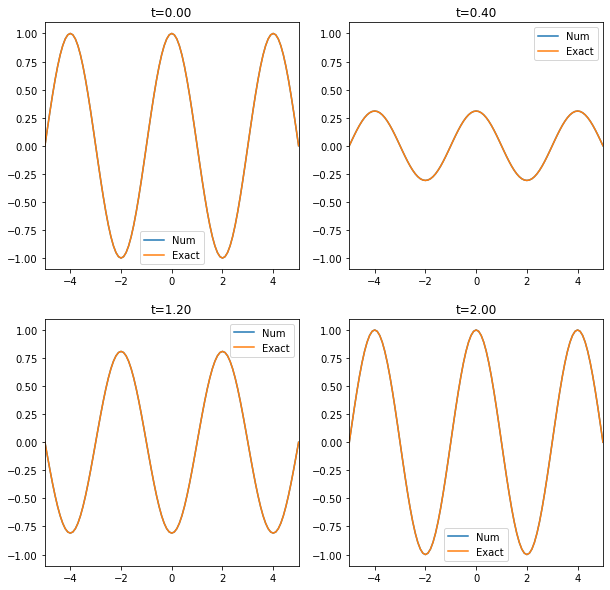

In [14]:
# The exact solution (if available)
def uexact(x,t):
    return np.cos(0.5*np.pi*x)*np.cos(np.pi*t)

# Plot the solution together with the exact solution
plt.rcParams['figure.figsize'] = [10, 10]

t_plot = [0, 0.4, 1.2, 2]

for i in range(4):
    plt.subplot(2,2,i+1)
    nt = round(t_plot[i]/k)
    plt.plot(x,U[:,nt], label='Num')
    plt.plot(x,uexact(x,nt*k), label='Exact')
    plt.axis([a, b, -1.1, 1.1])
    plt.title(f't={nt*k:.2f}')
    plt.legend()


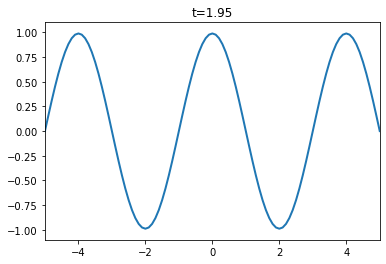

In [15]:
# Animation

# First set up the figure, the axis, and the plot element we want to animate
plt.rcParams['figure.figsize'] = [6, 4]
fig, ax = plt.subplots()

ax.set_xlim(( a, b))
ax.set_ylim((-1.1, 1.1))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    line.set_data(x, U[:,i])
    plt.title(f't={t[i]:.2f}')
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=N, interval=200, blit=True)
HTML(anim.to_html5_video())